Héctor Asorey de Pablos

<hr>

# PRÁCTICA 1: REGRESIÓN LINEAL

<hr>

En 1984 Hodgdon y Beckett (investigadores del centro de investigación de Salud de la marina de Estados Unidos) midieron el porcentaje de grasa corporal de un número relevante de miembros del ejército. Tras analizar todas estas mediciones propusieron una fórmula que permite estimar de manera sencilla el porcentaje de grasa corporal de las personas, con tan solo tomar una serie de medidas corporales con una cinta métrica. Estas fórmulas de cálculo de porcentaje de grasa corporal (BFP: Body Fat Percentage) fueron las siguientes, dependiendo delgénero de la persona:

* Hombres:𝐵𝐹𝑃 = 86,01 𝑥 log10(𝑐𝑖𝑛𝑡𝑢𝑟𝑎 − 𝑐𝑢𝑒𝑙𝑙𝑜) − 70,04 𝑥 𝑙𝑜𝑔10(𝑎𝑙𝑡𝑢𝑟𝑎) + 36,76 
* Mujeres:𝐵𝐹𝑃 = 163,21 𝑥 log10(𝑐𝑖𝑛𝑡𝑢𝑟𝑎 + 𝑐𝑎𝑑𝑒𝑟𝑎 − 𝑐𝑢𝑒𝑙𝑙𝑜) − 97,68 𝑥 𝑙𝑜𝑔10(𝑎𝑙𝑡𝑢𝑟𝑎) − 78,39

Fuente: https://www.calculator.net/body-fat-calculator.htmlTodas 

Estas medidas corporales se miden en pulgadas, siendo la relación 1cm = 0,3937 pulgadas

<hr>


### 1. CARGA DE LOS DATOS



In [1]:
import pandas as pd

df = pd.read_csv("./data/men_body_fat_precentage.csv")
df.sample(5)

,Edad,Peso,Altura,Cuello,Pecho,Cintura,Cadera,Muslo,Rodilla,Tobillo,Biceps,Antebrazo,Muñeca,BFP
1685,51,89.4,181.1,39.2,105.4,98.9,104.6,62.1,40.0,24.1,34.3,30.2,19.1,23.4
205,44,94.7,185.4,41.9,105.6,96.3,102.0,63.3,39.8,24.1,37.3,23.1,19.4,18.7
2120,25,88.1,178.3,36.3,101.2,102.3,104.0,65.7,41.2,24.6,33.6,29.1,18.4,29.5
941,39,72.9,177.0,36.5,95.8,86.5,93.5,56.8,36.2,22.2,30.7,26.9,17.2,18.5
950,34,98.1,187.2,40.6,106.9,101.3,109.2,66.6,41.1,24.4,37.5,30.6,18.5,20.6


<hr>


### 2. DIVISIÓN DE LOS DATOS EN ENTRENAMIENTO Y TEST (20%)



In [2]:
y_target = 'BFP'
X_columns = df.columns.drop(y_target).to_list()

X = df[X_columns].values
y = df[y_target].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

<hr>


### 3. GENERACIÓN DEL MODELO CON LOS DATOS DE ENTRENAMIENTO



In [4]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<hr>


### 4. EVALUACIÓN DEL MODELO


* Obtención de las predicciones


* Evaluación del modelo con los datos de entrenamiento y test



In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

betas = model.coef_
beta_0 = model.intercept_
print ("Modelo: Y = {b0:0.2f} + {b1:0.2f}X1 + {b2:0.2f}X2 + {b3:0.2f}X3 + {b4:0.2f}X4 + {b5:0.2f}X5 + {b6:0.2f}X6 + {b7:0.2f}X7 + {b8:0.2f}X8 + {b9:0.2f}X9 + {b10:0.2f}X10 + {b11:0.2f}X11 + {b12:0.2f}X12 + {b13:0.2f}X13 \n"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2], b4=betas[3], b5=betas[4], b6=betas[5], b7=betas[6], b8=betas[7], b9=betas[8], b10=betas[9], b11=betas[10], b12=betas[11], b13=betas[12]))

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

mae_train = mean_absolute_error(y_true=y_train, y_pred=y_predict_train)
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_predict_test)
print("MAE - Train: {error}".format(error=mae_train))
print("MAE - Test:  {error}".format(error=mae_test))

mse_train = mean_squared_error(y_true=y_train, y_pred=y_predict_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_predict_test)
print("\nMSE - Train: {error}".format(error=mse_train))
print("MSE - Test:  {error}".format(error=mse_test))


Modelo: Y = -1.55 + 0.03X1 + -0.11X2 + -0.09X3 + -0.57X4 + -0.04X5 + 0.88X6 + -0.18X7 + 0.18X8 + 0.04X9 + 0.01X10 + 0.14X11 + 0.24X12 + -0.92X13 

MAE - Train: 1.5482873888116717
MAE - Test:  1.521772599543457

MSE - Train: 3.6076601135837807
MSE - Test:  3.5501871872252004


In [6]:
import math
from statistics import mean

print("El valor medio de BFP es: " + str(mean(df['BFP'])))

El valor medio de BFP es: 20.385595238095238


<hr>


### 5. EVALUACIÓN MEDIANTE CROSS-VALIDATION


* Se va a dividir el conjunto de datos en 10 conjuntos distintos, entrenando 10 modelos diferentes.

* Al finalizar esta etapa, se creará un modelo final que entrene con todos los datos.



In [7]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10)
model = linear_model.LinearRegression()
contador = 0

for train, test in k_fold.split(X,y):
    
    contador+=1
    print("\nK = " + str(contador))
    
    #print('y_train: {}'.format(y[train]))
    model.fit(X[train], y[train])
    
    betas = model.coef_
    beta_0 = model.intercept_
    print ("Modelo: Y = {b0:0.2f} + {b1:0.2f}X1 + {b2:0.2f}X2 + {b3:0.2f}X3 + {b4:0.2f}X4 + {b5:0.2f}X5 + {b6:0.2f}X6 + {b7:0.2f}X7 + {b8:0.2f}X8 + {b9:0.2f}X9 + {b10:0.2f}X10 + {b11:0.2f}X11 + {b12:0.2f}X12 + {b13:0.2f}X13 \n"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2], b4=betas[3], b5=betas[4], b6=betas[5], b7=betas[6], b8=betas[7], b9=betas[8], b10=betas[9], b11=betas[10], b12=betas[11], b13=betas[12]))

    y_predict_train = model.predict(X[train])
    y_predict_test = model.predict(X[test])
    #print('y_test: {}\n'.format(y[test]))
    
    mae_train = mean_absolute_error(y_true=y[train], y_pred=y_predict_train)
    mae_test = mean_absolute_error(y_true=y[test], y_pred=y_predict_test)
    print("MAE - Train: {error}".format(error=mae_train))
    print("MAE - Test:  {error}".format(error=mae_test))

    mse_train = mean_squared_error(y_true=y[train], y_pred=y_predict_train)
    mse_test = mean_squared_error(y_true=y[test], y_pred=y_predict_test)
    print("\nMSE - Train: {error}".format(error=mse_train))
    print("MSE - Test:  {error}".format(error=mse_test))



K = 1
Modelo: Y = -3.24 + 0.03X1 + -0.13X2 + -0.08X3 + -0.60X4 + -0.03X5 + 0.89X6 + -0.18X7 + 0.18X8 + 0.07X9 + 0.00X10 + 0.14X11 + 0.26X12 + -0.92X13 

MAE - Train: 1.51373229442421
MAE - Test:  1.8048467228774818

MSE - Train: 3.4451991532435793
MSE - Test:  4.939255519907896

K = 2
Modelo: Y = 5.82 + 0.01X1 + -0.10X2 + -0.11X3 + -0.55X4 + -0.06X5 + 0.86X6 + -0.15X7 + 0.06X8 + 0.14X9 + -0.03X10 + 0.18X11 + 0.22X12 + -0.81X13 

MAE - Train: 1.5102294984419162
MAE - Test:  2.392463872583176

MSE - Train: 3.4028542271559785
MSE - Test:  7.096547935695044

K = 3
Modelo: Y = -1.02 + 0.05X1 + -0.12X2 + -0.09X3 + -0.57X4 + -0.03X5 + 0.86X6 + -0.19X7 + 0.23X8 + 0.07X9 + 0.08X10 + 0.09X11 + 0.25X12 + -1.03X13 

MAE - Train: 1.5435146121583392
MAE - Test:  1.6476565838118717

MSE - Train: 3.585857042102388
MSE - Test:  4.0276176370860055

K = 4
Modelo: Y = -4.03 + 0.03X1 + -0.13X2 + -0.09X3 + -0.58X4 + -0.03X5 + 0.87X6 + -0.17X7 + 0.19X8 + 0.09X9 + 0.04X10 + 0.13X11 + 0.26X12 + -0.92X13 

MAE

In [8]:
final_model = linear_model.LinearRegression()

final_model.fit(X, y)

betas = final_model.coef_
beta_0 = final_model.intercept_
print ("Modelo: Y = {b0:0.2f} + {b1:0.2f}X1 + {b2:0.2f}X2 + {b3:0.2f}X3 + {b4:0.2f}X4 + {b5:0.2f}X5 + {b6:0.2f}X6 + {b7:0.2f}X7 + {b8:0.2f}X8 + {b9:0.2f}X9 + {b10:0.2f}X10 + {b11:0.2f}X11 + {b12:0.2f}X12 + {b13:0.2f}X13 \n"
       .format(b0=beta_0, b1=betas[0], b2=betas[1], b3=betas[2], b4=betas[3], b5=betas[4], b6=betas[5], b7=betas[6], b8=betas[7], b9=betas[8], b10=betas[9], b11=betas[10], b12=betas[11], b13=betas[12]))

Modelo: Y = -1.08 + 0.03X1 + -0.12X2 + -0.09X3 + -0.60X4 + -0.03X5 + 0.87X6 + -0.17X7 + 0.17X8 + 0.08X9 + 0.02X10 + 0.13X11 + 0.26X12 + -0.91X13 



In [9]:
df['predictions'] = final_model.predict(df[X_columns].values).round(decimals = 2)
df.head(10)

,Edad,Peso,Altura,Cuello,Pecho,Cintura,Cadera,Muslo,Rodilla,Tobillo,Biceps,Antebrazo,Muñeca,BFP,predictions
0,23,70.0,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,15.7,17.86
1,22,78.6,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,9.8,10.87
2,22,69.9,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.3,20.70
3,26,83.8,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,13.8,13.93
4,24,83.6,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.6,28.79
5,24,95.4,189.9,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,20.8,18.37
6,26,82.1,177.2,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,20.6,18.89
7,25,79.8,184.2,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8,15.3,15.93
8,25,86.6,188.0,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2,8.4,11.07
9,23,89.9,186.7,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2,13.2,12.07


<hr>


### 6. GRÁFICOS COMPARATIVOS



In [10]:
import math

valoresModelo = final_model.predict(df[X_columns].values)

def calculaBFP(cintura, cuello, altura):
    𝐵𝐹𝑃 = 86.01 * math.log10((cintura*0.3937 - cuello*0.3937)) - 70.04 * math.log10(altura*0.3937) + 36.76
    return BFP

valoresFormula = []

for index, row in df.iterrows():
    valoresFormula.append(calculaBFP(row['Cintura'], row['Cuello'], row['Altura']))

valoresReales = df['BFP']

resultadoRegresion = []
resultadoFormula = []
resultadosGenerales = []

for i in range(len(valoresReales)):
    if(abs(valoresReales[i]-valoresModelo[i]) <= abs(valoresReales[i]-valoresFormula[i])):
        resultadoRegresion.append(1)
        resultadosGenerales.append(1)
    else:
        resultadoFormula.append(1)
        resultadosGenerales.append(-1)

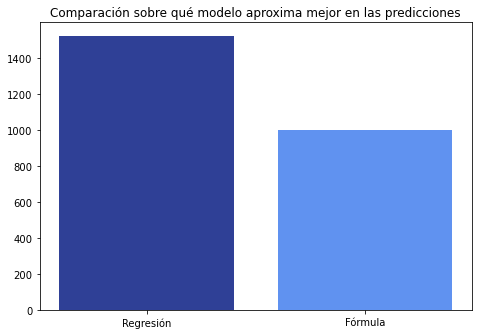

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelos = ['Regresión', 'Fórmula']
resultados = [sum(resultadoRegresion), sum(resultadoFormula)]
ax.bar(modelos, resultados, color=["#2f4096", "#6092f0"])
plt.title("Comparación sobre qué modelo aproxima mejor en las predicciones")
plt.show()

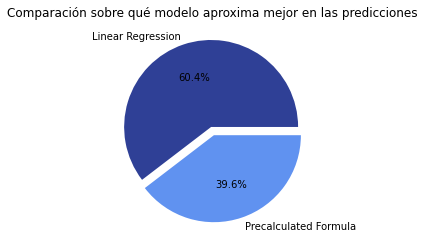

In [12]:
from functools import reduce

data1 = reduce(lambda x,y: x+y, filter(lambda x: True if x ==1 else False, resultadosGenerales))
data2 = reduce(lambda x,y: x+y, filter(lambda x: True if x ==-1 else False, resultadosGenerales))

data = [data1, abs(data2)]

plt.pie(data, labels = ["Linear Regression", "Precalculated Formula"], colors = ["#2f4096", "#6092f0"], autopct='%1.1f%%', explode = (0.05, 0.05))
plt.title("Comparación sobre qué modelo aproxima mejor en las predicciones")
plt.show()

El error medio que comete la regresión lineal es: 1.5453058794280619
El error medio que comete la fórmula precalculada es: 1.9447835684731145


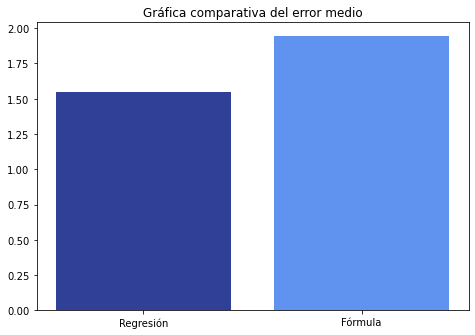

In [13]:
from statistics import mean

errorRegression = mean(list(map(lambda x, y: abs(x-y), valoresModelo, valoresReales)))
errorFormula = mean(list(map(lambda x, y: abs(x-y), valoresFormula, valoresReales)))

print("El error medio que comete la regresión lineal es: " + str(errorRegression))
print("El error medio que comete la fórmula precalculada es: " + str(errorFormula))

mediasError = [errorRegression, errorFormula] 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelos = ['Regresión', 'Fórmula']
errores = [errorRegression, errorFormula]
ax.bar(modelos, errores, color=["#2f4096", "#6092f0"])
plt.title("Gráfica comparativa del error medio")
plt.show()

<hr>


### 7. CONCLUSIONES



* Al entrenar el modelo con un 80% de entrenamiento y un 20% de test, el MAE es muy similar entre el conjunto de train y de test, lo cual indica que el modelo es robusto y es capaz de ajustarse a la realidad. 
* El error cometido por el modelo final, el cual se entrena con todo el conjunto de datos, es más o menos de 1.54, como se puede ver en las gráficas, y que, teniendo en cuenta el valor medio del BFP, 20.38, representa un error del 13% aproximadamente, siendo un porcentaje de error a tener en cuenta.
* Sin embargo, el error cometido por la fórmula facilitada en el enunciado del trabajo comete de media un error 1.94 aproximadamente, por lo que podemos concluir que el modelo de regresión se ajusta mejor a la realidad.
* Mediante el uso de cross-validation, se puede observar que la regresión lineal no puede generar 10 buenos modelos, pues la diferencia entre el MAE de train y de test puede ser muy elevada (por ejemplo, el caso del modelo 2, donde el MAE es de 1.51 y 2.39, respectivamente). Además, esto también puede ser un indicador de que, para una mejora, se debería tener un mayor número de datos y a su vez, datos más representativos de la realidad.